In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# offline and online shopping data
data=pd.read_csv("/content/file.csv")

In [38]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [9]:
data.head()

Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  ...  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA  ...   
3    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA  ...   
4  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   

   Avg_Price  Delivery_Charges  Coupon_Status  GST      Date Offline_Spend  \
0     153.71               6.5           Used  0.1  1/1/2019        4500.0   
1     153.71               6.5           Used  0.1  1/1/2019        4500.0   
2     122.77               6.5       Not Used  0.1  1/1/2019        4500.0   
3      81.50               6.5        Clicked  0.1  1/1/2019        4500.0   
4     153.71               6.5        Clicked  0.1  1/1/2019        4500.0   

   Online_Spend  Month  Coupon_Code Discount_pct  
0        2424.5      1       ELEC10         10.0  
1        2424.5      1       ELEC10         10.0  
2        2424.5      1       ELEC10         10.0  
3        2424.5      1       ELEC10         10.0  
4        2424.5      1       ELEC10         10.0  

[5 rows x 21 columns]

In [11]:
data.shape

(52955, 21)

In [12]:
data=data.dropna()

In [13]:
data.Month.info()

<class 'pandas.core.series.Series'>
Index: 52524 entries, 0 to 52923
Series name: Month
Non-Null Count  Dtype
--------------  -----
52524 non-null  int64
dtypes: int64(1)
memory usage: 820.7 KB


In [14]:
data.duplicated().value_counts()

False    52524
Name: count, dtype: int64

In [15]:
data=data[:]  # used to make clone of the original data

In [16]:
data.CustomerID.nunique()

1468

In [17]:
data.drop(['Transaction_ID','Product_SKU','Transaction_Date','Date'],axis=1,inplace=True)

In [18]:
data.columns

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [19]:
data1=data.drop_duplicates()

In [20]:
data['Total Prices']=data.Avg_Price+data.Delivery_Charges

In [21]:
val1=data['Total Prices']

In [22]:
val1=data[['CustomerID','Total Prices']]

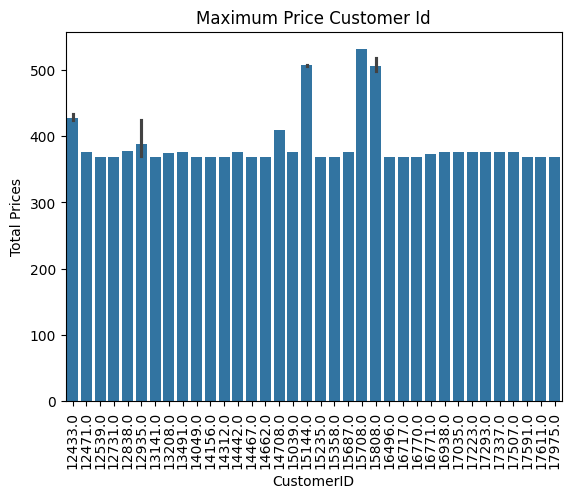

In [23]:
#top 50 perchase Customer Id
val1=val1.sort_values(by='Total Prices',ascending=False)
sns.barplot(x=val1.CustomerID.head(50),y=val1['Total Prices'].head(50))
plt.xticks(rotation=90)
plt.title("Maximum Price Customer Id")
plt.show()

<ipython-input-24-6b3cb3cd8fb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val2.index,y=val2,palette='rainbow')


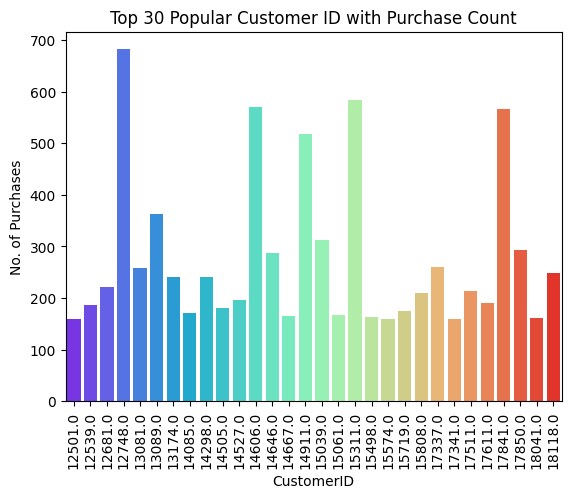

In [24]:
# TOP 30 Popular Customer ID With Purchase Count
val2=data.CustomerID.value_counts().sort_values(ascending=False).head(30)
sns.barplot(x=val2.index,y=val2,palette='rainbow')
plt.xticks(rotation=90)
plt.ylabel('No. of Purchases')
plt.title('Top 30 Popular Customer ID with Purchase Count')
plt.show()

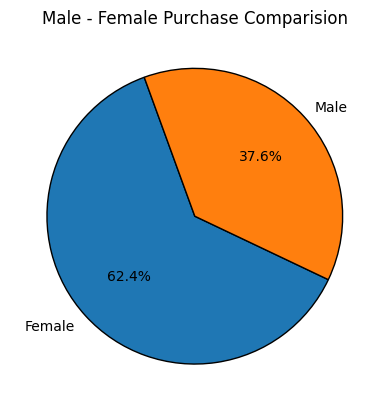

In [25]:
# finding the percentage of male and female shopping
from numpy.lib.function_base import percentile
val3=data.Gender.value_counts()
plt.pie(val3,labels=['Female','Male'],autopct="%1.1f%%", wedgeprops={'edgecolor':'black'},startangle=110)
plt.title('Male - Female Purchase Comparision')
plt.show()

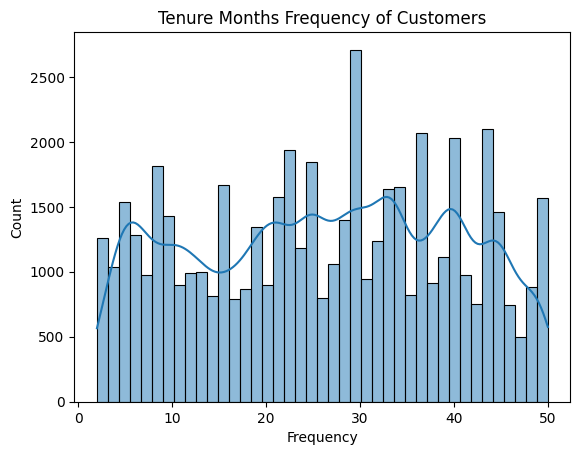

In [26]:
# Tenure Months Frequency Of Customers
val4=data.Tenure_Months
sns.histplot(data['Tenure_Months'],kde=True) # Kernel Density Estimation(KDE) is used to estimate the probability density function of a random variable
plt.xlabel('Frequency')
plt.title('Tenure Months Frequency of Customers')
plt.show()

In [27]:
data['Total_Spend']=data['Offline_Spend']+data['Online_Spend']
new=data.groupby('Month').sum()

In [28]:
# Importing Calendar For Time Series Analysis
import calendar #allows the calculations for various task based on date, month, and year
mon=list(calendar.month_name)[1:]

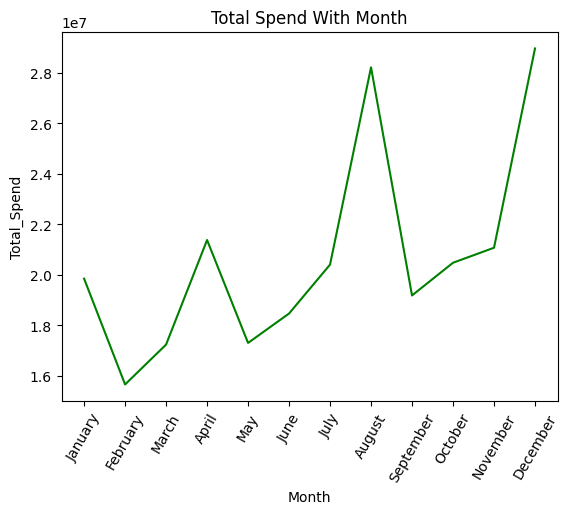

In [29]:
# total spend with online and offline
sns.lineplot(y=new.Total_Spend, x=new.index, color='g')
plt.xticks(new.index,mon, rotation=60)
plt.title("Total Spend With Month")
plt.show()

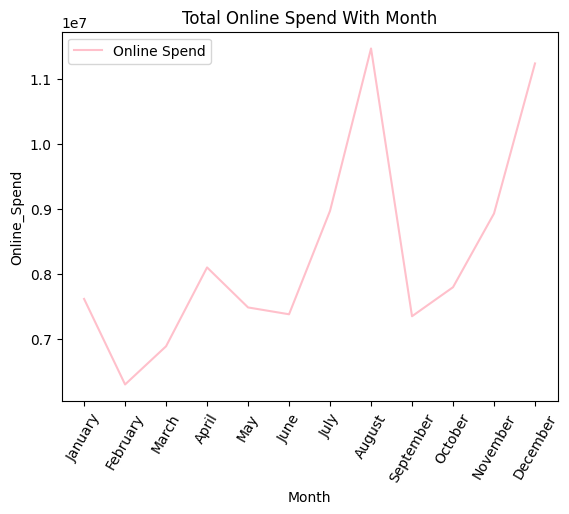

In [30]:
# Online Spend
sns.lineplot(y=new.Online_Spend,x=new.index,color='pink',label='Online Spend')
plt.xticks(new.index,mon,rotation=60)
plt.title("Total Online Spend With Month")
plt.show()

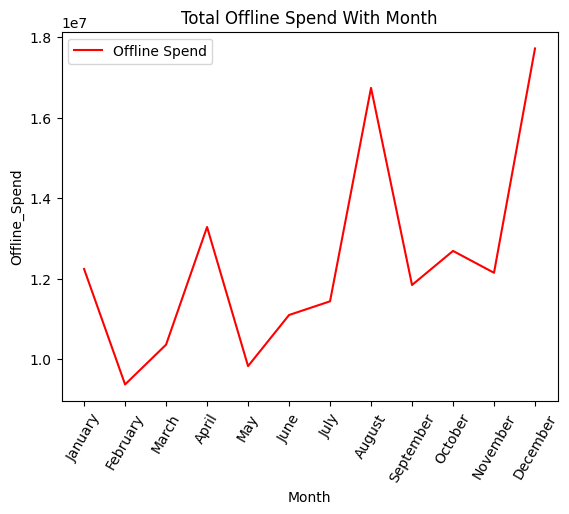

In [31]:
# Offline Spend
sns.lineplot(y=new.Offline_Spend,x=new.index,label='Offline Spend',color='r')
plt.xticks(new.index,mon,rotation=60)
plt.title("Total Offline Spend With Month")
plt.show()

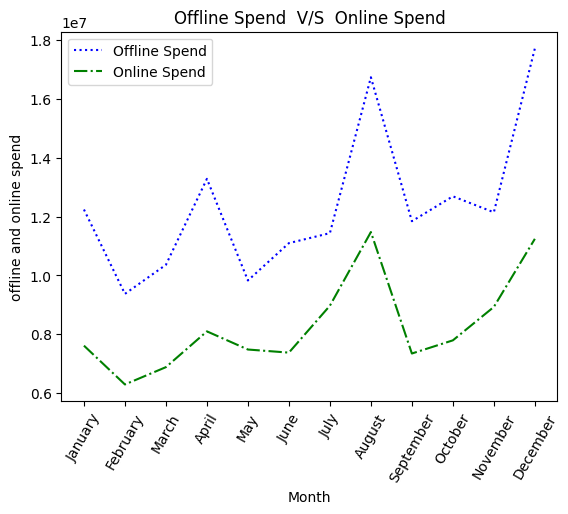

In [32]:
# Offline Spend  V/S  Online Spend
sns.lineplot(y=new.Offline_Spend,x=new.index,label='Offline Spend',color='b',linestyle=':')
sns.lineplot(y=new.Online_Spend,x=new.index,label='Online Spend',color='green',linestyle='-.')
plt.xticks(new.index,mon,rotation=60)
plt.title("Offline Spend  V/S  Online Spend")
plt.ylabel("offline and online spend")
plt.legend()
plt.show()

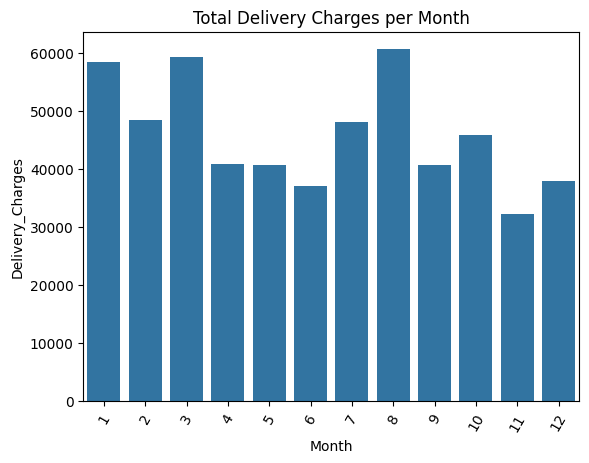

In [33]:
# Total Delivery Charges Per Month
delivery=data[['Delivery_Charges','Month']].groupby('Month').sum()
sns.barplot(data=delivery,x=delivery.index,y='Delivery_Charges')
plt.xticks(delivery.index-1,rotation=60)
plt.title("Total Delivery Charges per Month")
plt.show()

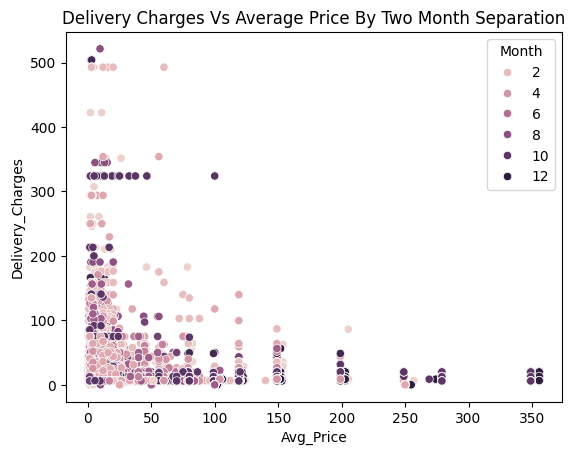

In [34]:
# Delivery Charges Vs Average Price
sns.scatterplot(data=data,x='Avg_Price',y='Delivery_Charges',hue="Month")
plt.title("Delivery Charges Vs Average Price By Two Month Separation")
plt.show()

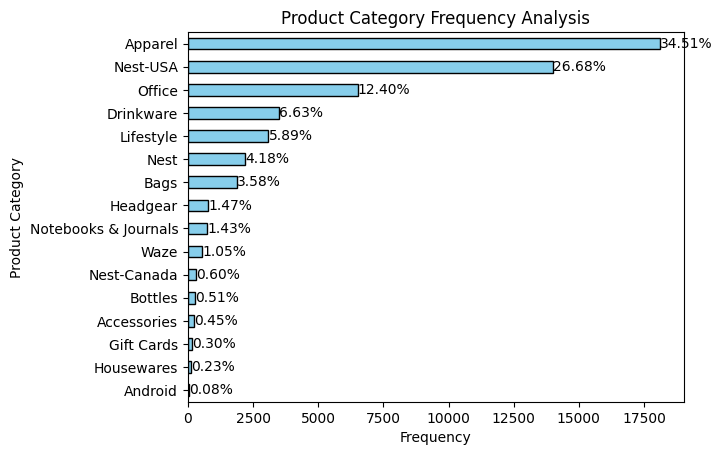

In [35]:
# Product Category Frequency Analysis
import matplotlib.pyplot as plt
new1 = data.groupby('Product_Category').size()
fig, ax = plt.subplots()
new1.sort_values().plot(kind='barh', color='skyblue', edgecolor='black', ax=ax)
for index, value in enumerate(new1.sort_values()):
    ax.text(value, index, f'{value/sum(new1)*100:.2f}%', va='center')
ax.set_xlabel('Frequency')
ax.set_ylabel('Product Category')
plt.title("Product Category Frequency Analysis")
plt.show()


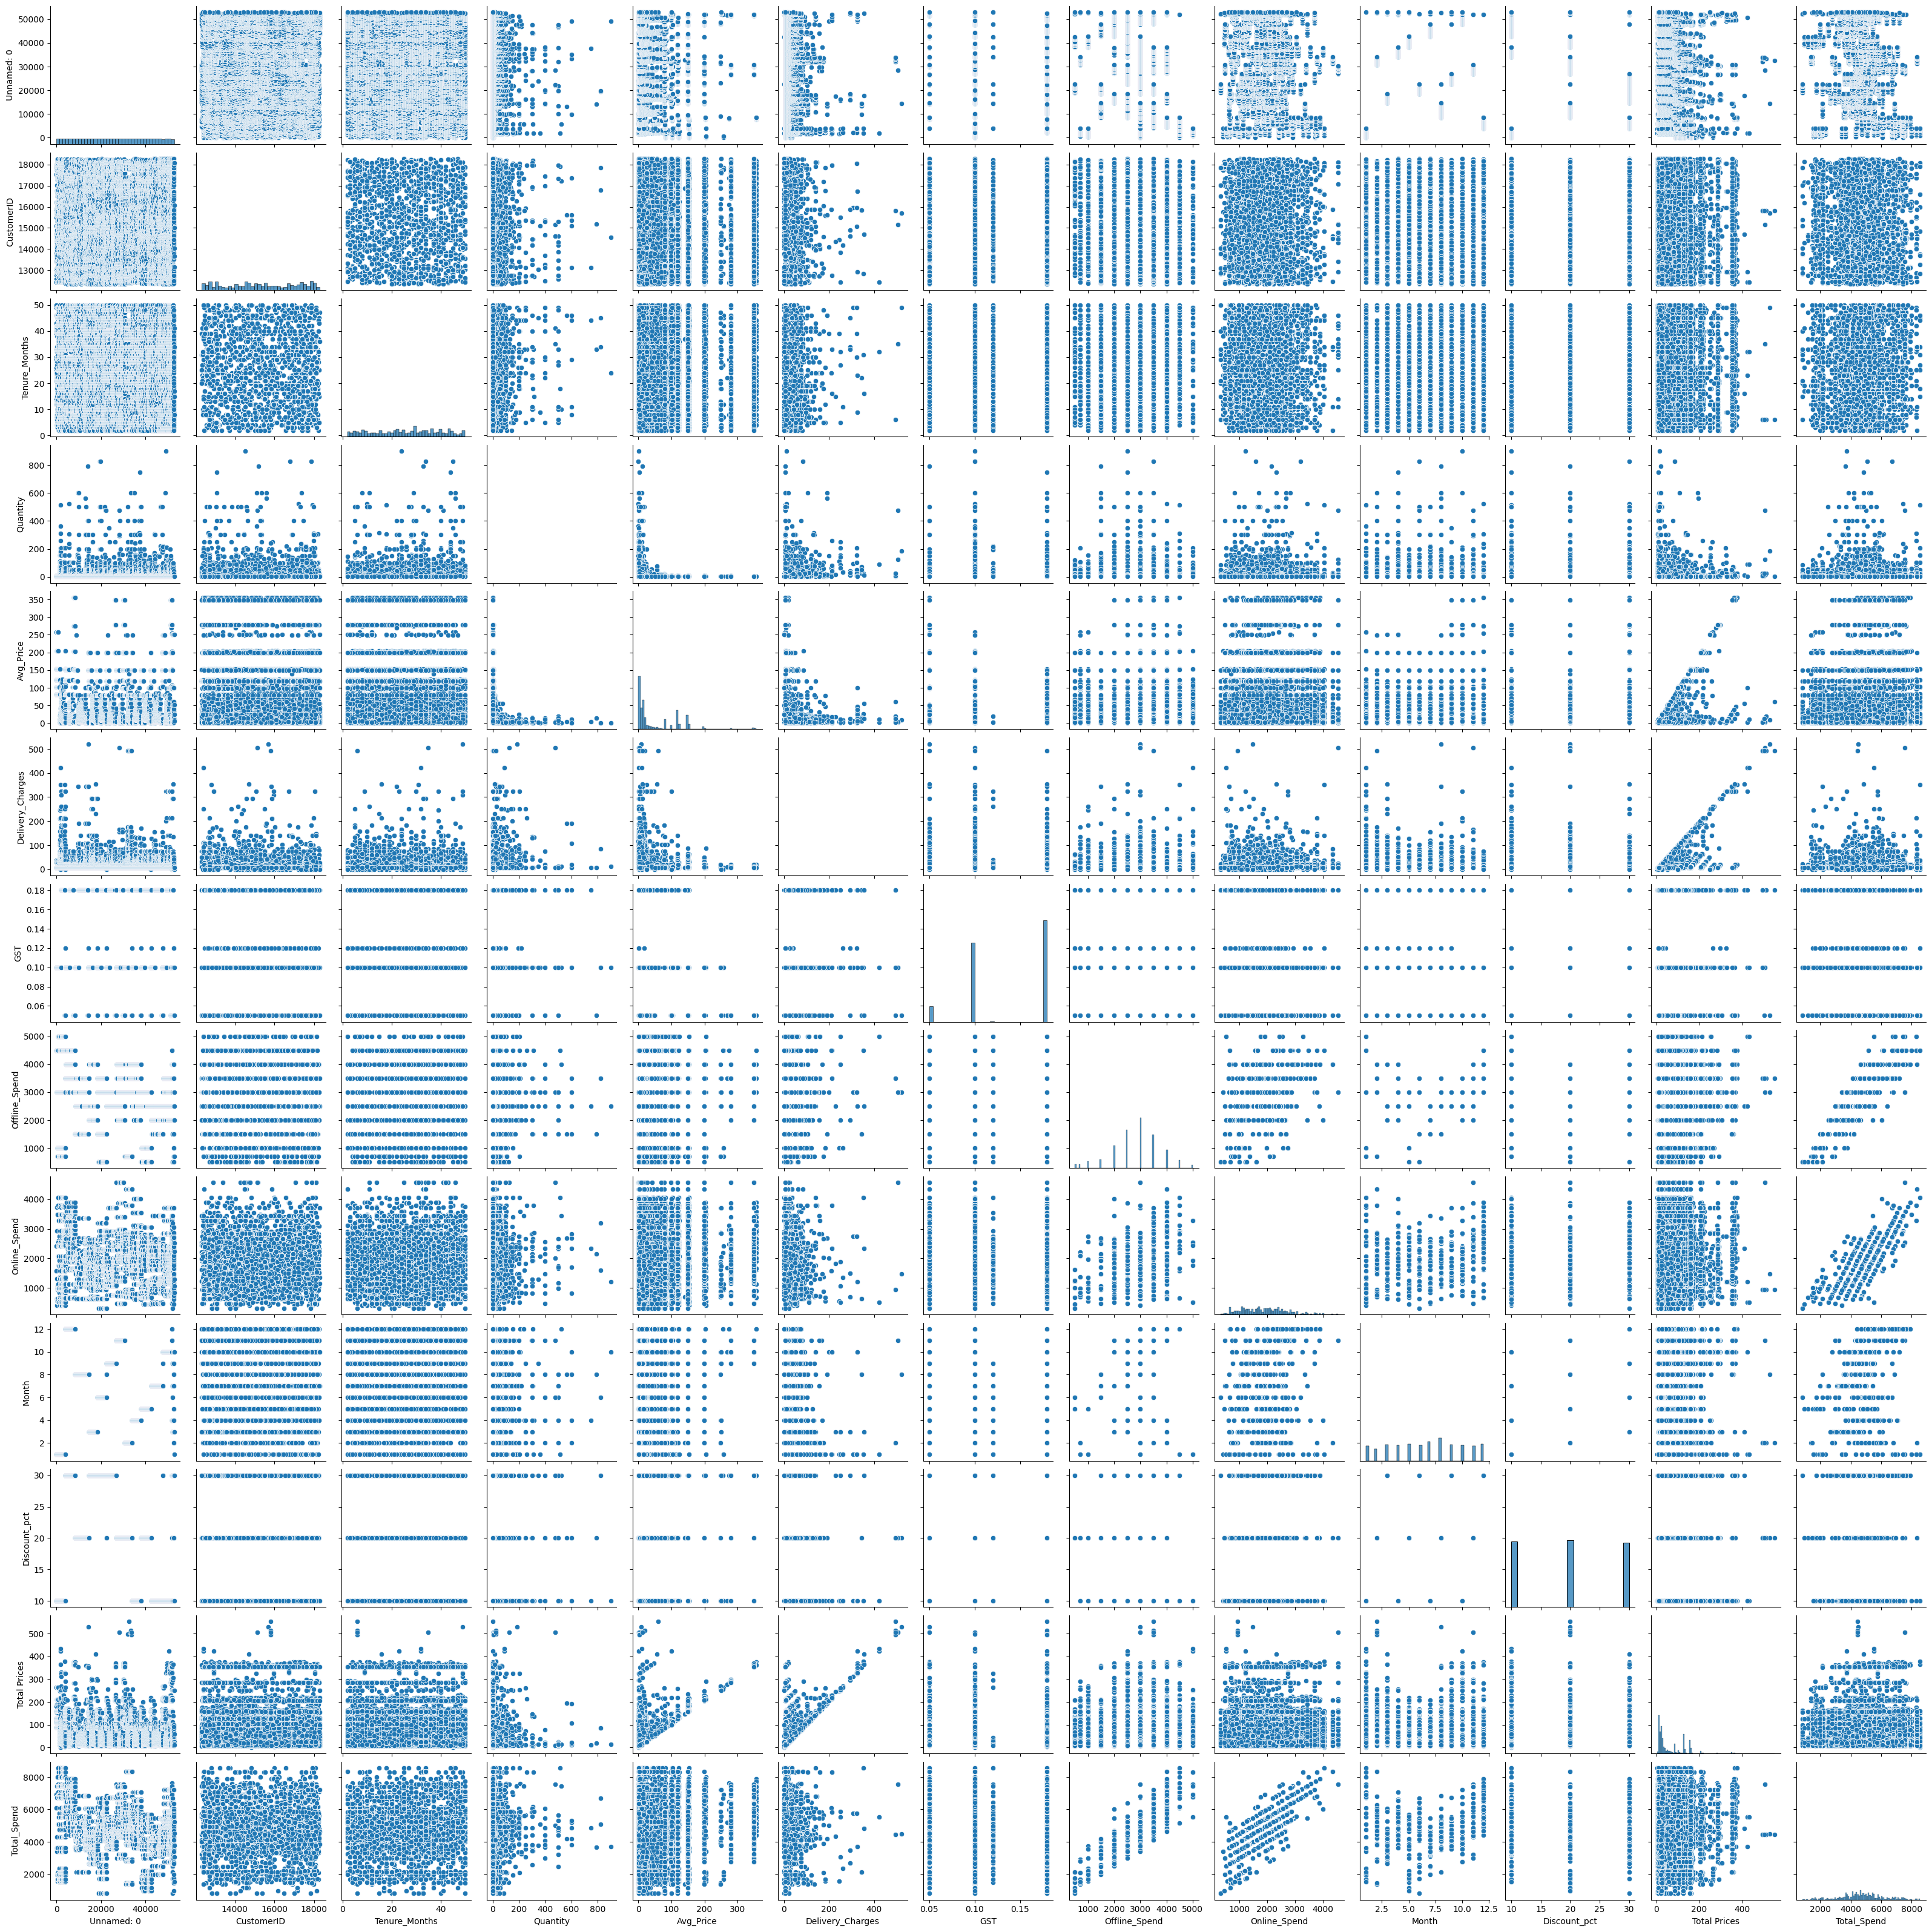

In [36]:
sns.pairplot(data) # pair wise relationships b/w varaibles
plt.show()

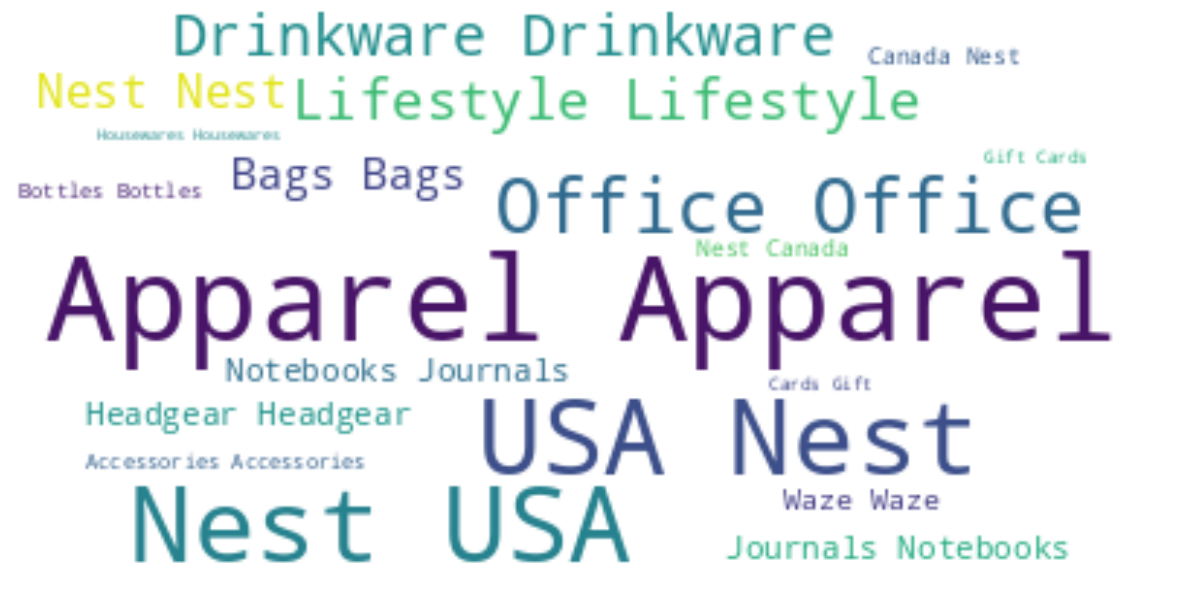

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(15, 10))
wc = WordCloud(background_color='white') #a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
wc.generate(' '.join(data1['Product_Category']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()